<a href="https://colab.research.google.com/github/a01275646/proyecto/blob/main/Tarea%201%3A%20Datos%20geo-espaciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install netCDF4
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.0 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from netCDF4 import num2date, date2num, Dataset as NetCDFFile
import cartopy.crs as ccrs
import cartopy.feature as cfeature

input_file = "/content/drive/MyDrive/ciencia de datos/MERRA2_300.inst3_3d_asm_Np.20051019.nc4"

nc = NetCDFFile(input_file)

In [6]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Tue Nov 11 07:18:35 2014 GMT
    Comment: GMAO filename: d5124_m2_jan00.inst3_3d_asm_Np.20051019.nc4
    Filename: MERRA2_300.inst3_3d_asm_Np.20051019.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2I3NPASM
    GranuleID: MERRA2_300.inst3_3d_asm_Np.20051019.nc4
    ProductionDateTime: Original file generated: Tue Nov 11 07:18:35 2014 GMT
    LongName: MERRA2 inst3_3d_asm_Np: 3d,3-Hourly,Instantaneous,Pressure-Level,Assimilation,Assimilated Meteorological Fields
    Title: MERRA2 inst3_3d_asm_Np: 3d,3-Hourly,Instantaneous,Pressure-Level,Assimilation,Assimilated Meteorological Fields
    Southe

In [3]:
#longitude and latitude values
lons = nc.variables['lon'][:]; Nlons = np.size(lons)
lats = nc.variables['lat'][:]; Nlats = np.size(lats)
levs = nc.variables['lev'][:]; Nlevs = np.size(levs)

raw_times = nc.variables ['time'][:]; Ntimes = np.size(raw_times)

ncvar2D = ['SLP','PS']
Nvars2D = np.size(ncvar2D)

ncvar3D = ['T','U', 'V', 'RH']
Nvars3D = np.size(ncvar3D)

myvars2D = np.empty((Ntimes,Nlats, Nlons, Nvars2D));
myvars2D.fill(np.NaN)
myvars3D = np.empty((Ntimes,Nlevs,Nlats, Nlons, Nvars3D));
myvars3D.fill(np.NaN)


for j,elem in enumerate(ncvar2D):
  myvars2D[:,:,:,j] = nc.variables[elem][:]
del j, elem

for j,elem in enumerate(ncvar3D):
  myvars3D[:,:,:,:,j] = nc.variables[elem][:]
del j, elem

nc.close()

horas = raw_times/60

print(Nlevs)

<ipython-input-3-3fbcf14a0394>:6: RuntimeWarning: invalid value encountered in cast
  raw_times = nc.variables ['time'][:]; Ntimes = np.size(raw_times)
<ipython-input-3-3fbcf14a0394>:6: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  raw_times = nc.variables ['time'][:]; Ntimes = np.size(raw_times)


42


In [4]:
h = 8500
z = -h*np.log(levs/1013)
ind_levs = np.arange(Nlevs)
pressure = 300
def ajuste(levs, pressure):
  diferencias = np.abs(levs - pressure) #Calcula la diferencia de valor entre la presion y el valor más cercano del arreglo
  ind = np.argmin(diferencias) #Encuentra el indice con el valor minimo
  return ind


pressure = 300

index = ajuste(levs,pressure)

print(index)


20


##Presión a Nivel del Mar a lo largo de 8 horas


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


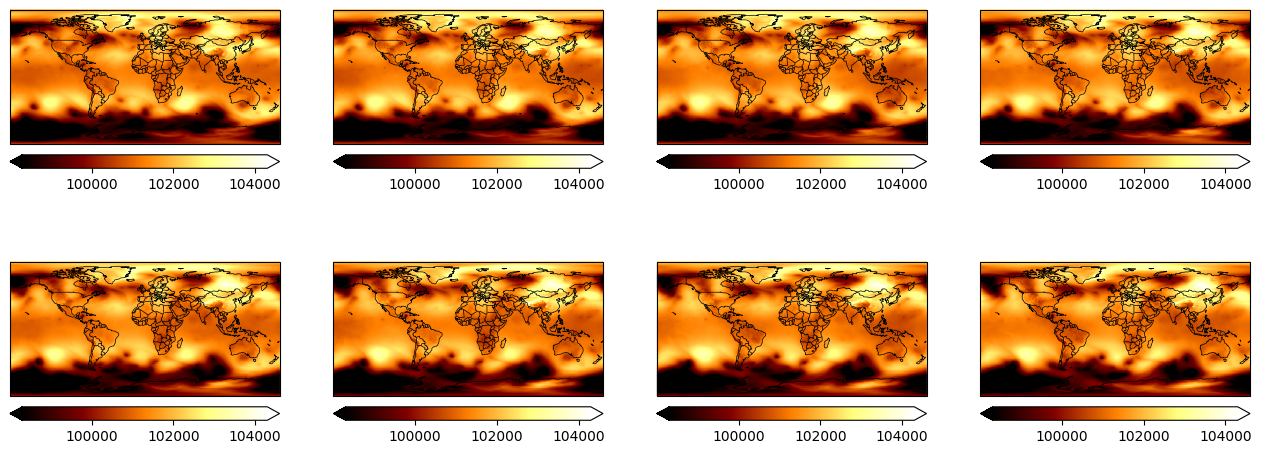

In [5]:
fig = plt.figure(figsize=(16,6))
for i in range(0,8):
  ax = fig.add_subplot(2,4,1+i, projection=ccrs.PlateCarree())
  ax.add_feature(cfeature.BORDERS, linewidth=0.5)
  ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

  psave = 101300
  dp = 3000
  mynorm = plt.Normalize(vmin=psave-dp, vmax=psave+dp)
  mycmap = plt.get_cmap('afmhot',1000)

  jt = i
  jvar = 0

  cax = ax.pcolormesh(lons,lats,myvars2D[jt,:,:,jvar],cmap=mycmap, transform=ccrs.PlateCarree(),norm=mynorm)
  cbar = fig.colorbar(cax,ax=ax, orientation='horizontal', pad=0.05, extend='both')


##Presión a nivel superficial


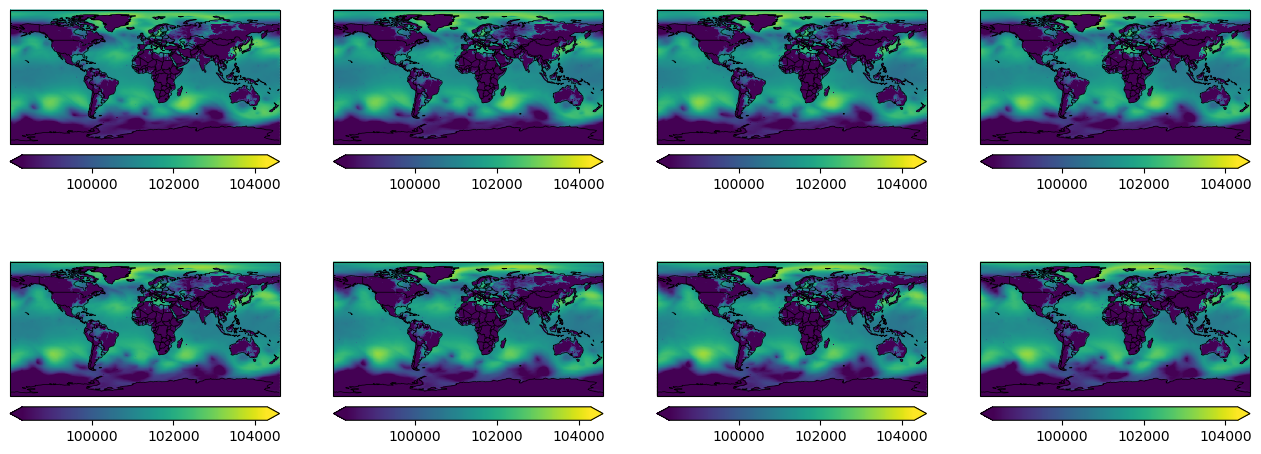

In [6]:
fig = plt.figure(figsize=(16,6))
for i in range(0,8):
  ax = fig.add_subplot(2,4,1+i, projection=ccrs.PlateCarree())
  ax.add_feature(cfeature.BORDERS, linewidth=0.5)
  ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

  psave = 101300
  dp = 3000
  mynorm = plt.Normalize(vmin=psave-dp, vmax=psave+dp)
  mycmap = plt.get_cmap('viridis',1000)

  jt = i
  jvar = 1

  cax = ax.pcolormesh(lons,lats,myvars2D[jt,:,:,jvar],cmap=mycmap, transform=ccrs.PlateCarree(),norm=mynorm)
  cbar = fig.colorbar(cax,ax=ax, orientation='horizontal', pad=0.05, extend='both')

##2

In [ ]:
fig = plt.figure(figsize=(12,18))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #Proyección en Rectángulo

#Agrega costas y fronteras
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)


#mynorm = plt.Normalize(vmin=50000, vmax=108300)

mycmap = plt.get_cmap('coolwarm',1000)

jt = 0 #Intervalo de 0 a 7
jvar = 0 #Indice de myvars3D
jlev = 1 #Niveles de altura (Máximo 42)

mag = np.sqrt((myvars3D[:,jlev,:,:,1]**2)+(myvars3D[:,jlev,:,:,2]**2))

cax = ax.pcolormesh(lons,lats,myvars3D[jt,jlev,:,:,jvar],cmap=mycmap, transform=ccrs.PlateCarree())
cbar = fig.colorbar(cax,ax=ax, orientation='horizontal', pad=0.03, extend='both')

In [8]:
#Limpiando la
print(myvars3D[jt,jlev,:,:,jvar])
myvars3D_new = np.where(myvars3D<10**10,myvars3D,np.NaN) #Limpia los valores que no están definidos, sustituyendolo por NaN

[[9.99999987e+14 9.99999987e+14 9.99999987e+14 ... 9.99999987e+14
  9.99999987e+14 9.99999987e+14]
 [9.99999987e+14 9.99999987e+14 9.99999987e+14 ... 9.99999987e+14
  9.99999987e+14 9.99999987e+14]
 [9.99999987e+14 9.99999987e+14 9.99999987e+14 ... 9.99999987e+14
  9.99999987e+14 9.99999987e+14]
 ...
 [2.57102783e+02 2.57102783e+02 2.57110596e+02 ... 2.57087158e+02
  2.57094971e+02 2.57094971e+02]
 [2.54657471e+02 2.54657471e+02 2.54657471e+02 ... 2.54649658e+02
  2.54649658e+02 2.54649658e+02]
 [2.52688721e+02 2.52688721e+02 2.52688721e+02 ... 2.52688721e+02
  2.52688721e+02 2.52688721e+02]]


In [9]:
mag =  np.sqrt((myvars3D_new[:,jlev,:,:,1]**2)+(myvars3D[:,jlev,:,:,2]**2))

[[[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [6.66530596 6.6323612  6.59721327 ... 6.77144735 6.73644259 6.7012363 ]
  [2.71418235 2.6837291  2.65378963 ... 2.8043148  2.77416209 2.7441171 ]
  [2.31063528 2.31993304 2.33000673 ... 2.28425143 2.29279641 2.30159038]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [3.43213357 3.43694873 3.44486797 ... 3.43036399 3.42904243 3.42877697]
  [3.32957335 3.34842108 3.36875032 ... 3.28135164 3.29553807 3.31131558]
  [4.93958493 4.95586936 4.97299293 ... 4.89386358 4.90760233 4.92223401]]

 [[       nan        nan        nan ...        nan        nan        nan]
  [       nan        n

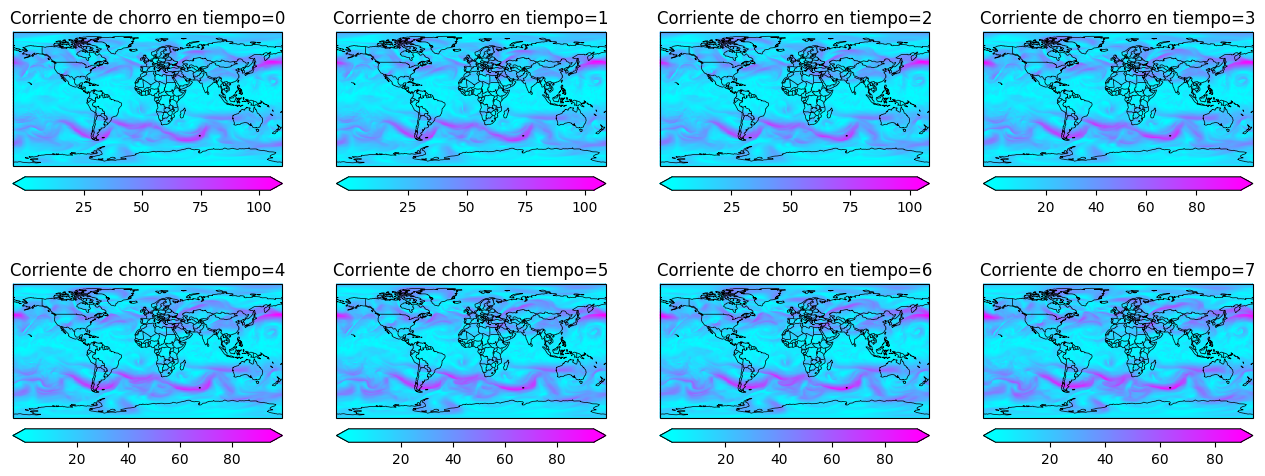

In [36]:
hPa = 300
fig = plt.figure(figsize=(16,6))

#jlev = 300
#mag = np.sqrt((myvars3D[:,j300,:,:,1]**2)+(myvars3D[:,j300,:,:,2]**2))
for i in range(0,8):
  ax = fig.add_subplot(2,4,1+i, projection=ccrs.PlateCarree())
  ax.add_feature(cfeature.BORDERS, linewidth=0.5)
  ax.add_feature(cfeature.COASTLINE, linewidth=0.5)


  mycmap = plt.get_cmap('cool',1000)

  jt = i
  jlev = ajuste(levs,hPa)

  mag2 =  np.sqrt((myvars3D_new[:,jlev,:,:,1]**2)+(myvars3D[:,jlev,:,:,2]**2))

  cax = ax.pcolormesh(lons,lats,mag2[jt,:,:],cmap=mycmap, transform=ccrs.PlateCarree())
  cbar = fig.colorbar(cax,ax=ax, orientation='horizontal', pad=0.05, extend='both')
  plt.title(f"Corriente de chorro en tiempo={i}")

##3 Evolución del Húracan Wilma

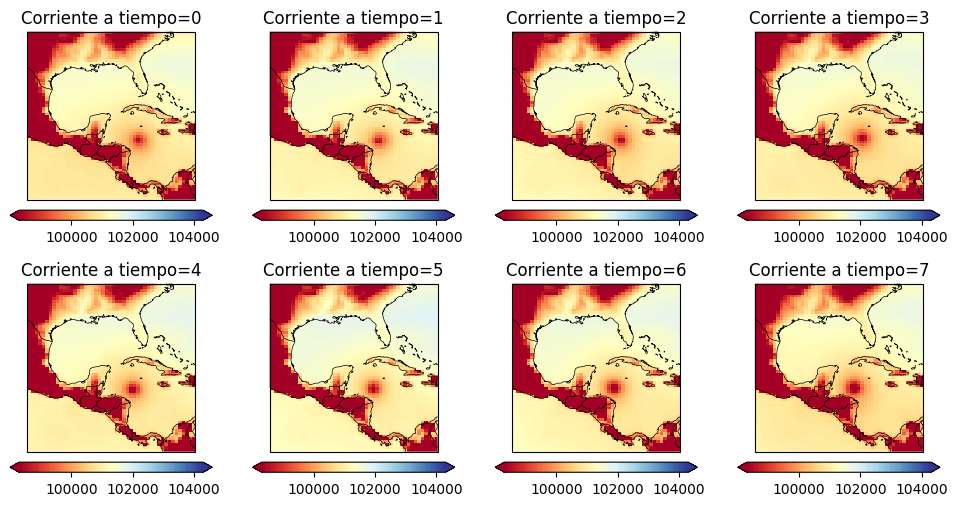

In [14]:
cun_lat = 21.2
cun_lon = -86.64
dx = 15

fig = plt.figure(figsize=(12,6))
for i in range(0,8):
  ax = fig.add_subplot(2,4,1 + i, projection=ccrs.PlateCarree())
  ax.add_feature(cfeature.BORDERS, linewidth=0.5)
  ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
  ax.set_extent((cun_lon - dx, cun_lon + dx, cun_lat - dx, cun_lat + dx), crs=ccrs.PlateCarree())

  psave = 101300
  dp = 3000
  mynorm = plt.Normalize(vmin=psave-dp, vmax=psave+dp)
  mycmap = plt.get_cmap('RdYlBu',100)

  jt = i
  jvar = 1

  cax = ax.pcolormesh(lons,lats,myvars2D[jt,:,:,jvar],cmap=mycmap, transform=ccrs.PlateCarree(),norm=mynorm)
  cbar = fig.colorbar(cax,ax=ax, orientation='horizontal', pad=0.05, extend='both')
  plt.title(f"Corriente a tiempo={i}")

###Humedad Relativa

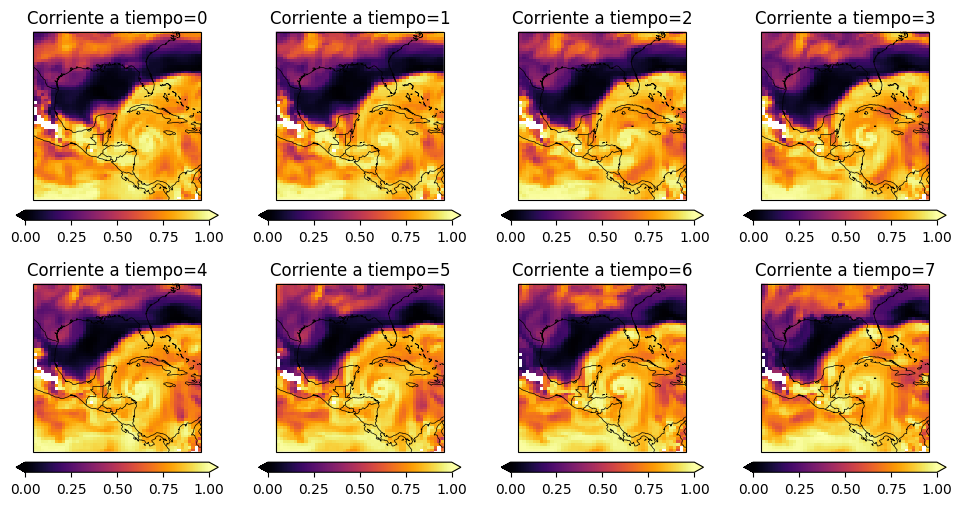

In [27]:
cun_lat = 21.2
cun_lon = -86.64
dx = 15
hpa = 800

fig = plt.figure(figsize=(12,6))
for i in range(0,8):
  ax = fig.add_subplot(2,4,1 + i, projection=ccrs.PlateCarree())
  ax.add_feature(cfeature.BORDERS, linewidth=0.5)
  ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
  ax.set_extent((cun_lon - dx, cun_lon + dx, cun_lat - dx, cun_lat + dx), crs=ccrs.PlateCarree())

  mynorm = plt.Normalize(vmin=0, vmax=1)
  mycmap = plt.get_cmap('inferno',1000)

  jt = i
  jvar = 0
  jlev = ajuste(levs,hpa)


  cax = ax.pcolormesh(lons,lats,myvars3D_new[jt,jlev,:,:,3],cmap=mycmap, transform=ccrs.PlateCarree(),norm=mynorm)
  cbar = fig.colorbar(cax,ax=ax, orientation='horizontal', pad=0.05, extend='both')
  plt.title(f"Corriente a tiempo={i}")

###4. Investiga las coordenadas de la ciudad de México. Encuentra el punto de malla más cercano. Grafica la evolución de la temperatura a lo largo del día para la superficie (el primer nivel vertical donde haya datos válidos).

In [22]:
def latn(lats,cla):
  diff_lat = np.abs(lats - cla)
  ind_lat = np.argmin(diff_lat)
  return ind_lat

def lont(lons,clo):
  diff_lon = np.abs(lons - clo)
  ind_lon = np.argmin(diff_lon)
  return ind_lon


aka = latn(lats,19.42847)
lolo = lont(lons,-99.12766)

print(aka)
print(lolo)

219
129


11


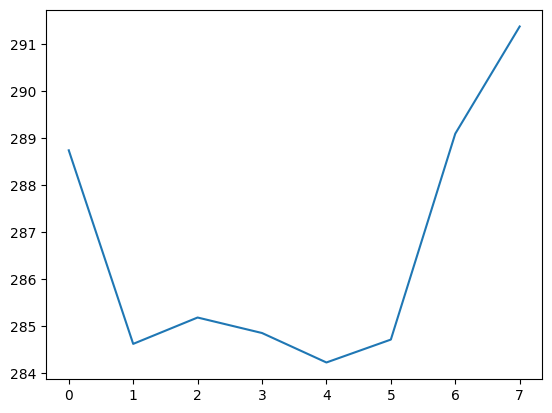

In [23]:
cdmx_lat = latn(lats,19.42847)
cdmx_lon = lont(lons,-99.12766)
p_lev = myvars3D_new[0,:,cdmx_lat,cdmx_lon,0]

pp = (~np.isnan(p_lev))

pf = ajuste(pp,1)
print(pf)

plt.figure()
plt.plot(myvars3D_new[:,pf,cdmx_lat,cdmx_lon,0])



###5. Busca las coordenadas de las siguientes ciudades: Londres, Nueva York, Sydney, Mérida. Para cada lugar, grafica el perfil de temperatura desde la superficie hasta la 'cima' de la atmósfera', y muestra los perfiles para las 8 horas del día.

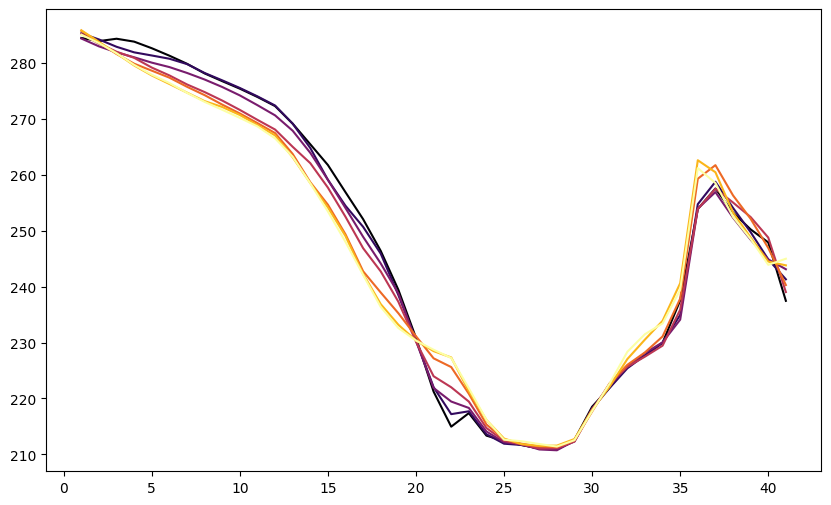

In [58]:
#Agrego las latitudes de las ciudades
london_lat = 51.50853
london_lon = -0.12574
dx = 5

colors = plt.cm.inferno(np.linspace(0, 1, 7))

plt.figure(figsize=(10,6))

#Grafica el nivel de temperatura de acuerdo a los 8 tiempos del día y con el punto de malla de la ciudad
for i in range(0,7):
  jt = i
  lond_lat = latn(lats,london_lat)
  lond_lon = lont(lons,london_lon)

  plt.plot(myvars3D_new[jt,:,lond_lat,lond_lon,0], color=colors[i], label=f'jt={jt}')
  plt.title("Temperatura en Londres desde la superficie hasta la cima de la atmósfera")
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

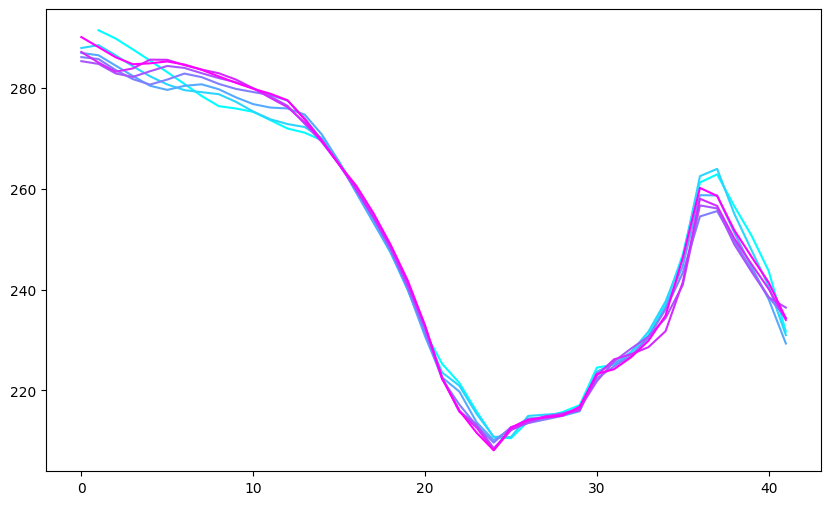

In [61]:
#Agrego las latitudes de las ciudades
ny_lat = 40.71427
ny_lon = -74.00597

colors = plt.cm.cool(np.linspace(0, 1, 7))

plt.figure(figsize=(10,6))

#Grafica el nivel de temperatura de acuerdo a los 8 tiempos del día y con el punto de malla de la ciudad
for i in range(0,7):
  jt = i
  new_york_lat = latn(lats,ny_lat)
  new_york_lon = lont(lons,ny_lon)

  plt.plot(myvars3D_new[jt,:,new_york_lat,new_york_lon,0], color=colors[i], label=f'jt={jt}')
  plt.title("Temperatura en Nueva York desde la superficie hasta la cima de la atmósfera")
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
  plt.xlabel("")

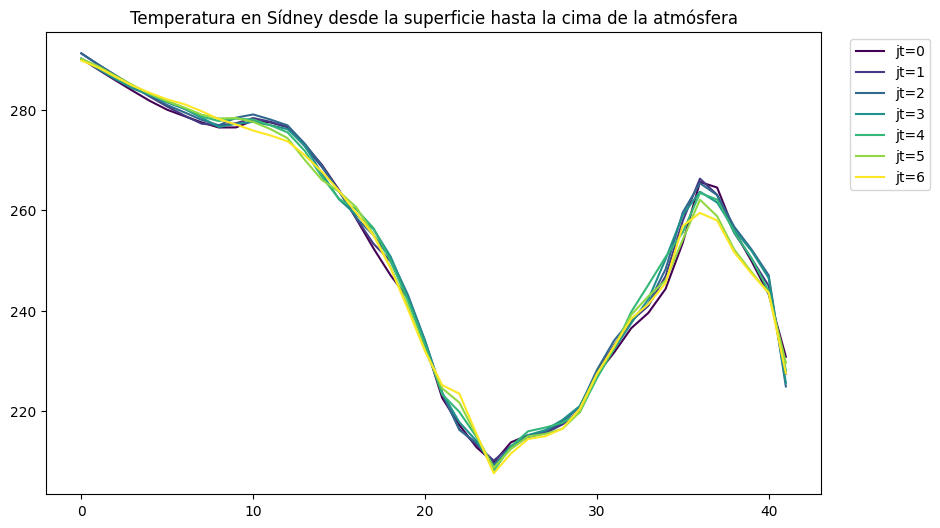

In [34]:
#Agrego las latitudes de las ciudades
sydney_lat = -33.86785
sydney_lon = 151.20732

colors = plt.cm.viridis(np.linspace(0, 1, 7))

plt.figure(figsize=(10,6))

#Grafica el nivel de temperatura de acuerdo a los 8 tiempos del día y con el punto de malla de la ciudad
for i in range(0,7):
  jt = i
  syd_lat = latn(lats,sydney_lat)
  syd_lon = lont(lons,sydney_lon)

  plt.plot(myvars3D_new[jt,:,syd_lat,syd_lon,0], color=colors[i], label=f'jt={jt}')
  plt.title("Temperatura en Sídney desde la superficie hasta la cima de la atmósfera")
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

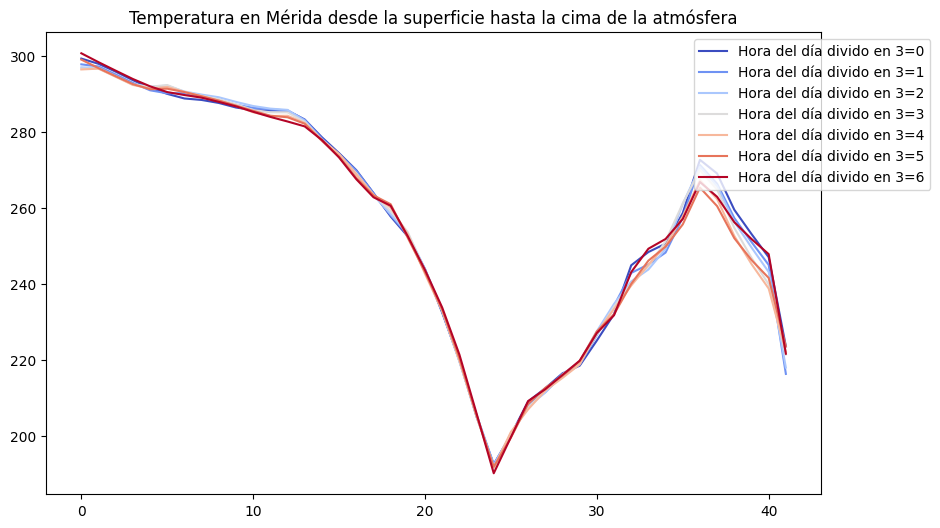

In [33]:
#Agrego las latitudes de las ciudades
merida_lat = 20.97537
merida_lon = -89.61696

#Agrego color para cada linea
colors = plt.cm.coolwarm(np.linspace(0, 1, 7))

plt.figure(figsize=(10,6))

#Grafica el nivel de temperatura de acuerdo a los 8 tiempos del día y con el punto de malla de la ciudad
for i in range(0,7):
  jt = i
  mer_lat = latn(lats,merida_lat)
  mer_lon = lont(lons,merida_lon)

  plt.plot(myvars3D_new[jt,:,mer_lat,mer_lon,0], color=colors[i], label=f'Hora del día divido en 3={jt}')
  plt.title("Temperatura en Mérida desde la superficie hasta la cima de la atmósfera")
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

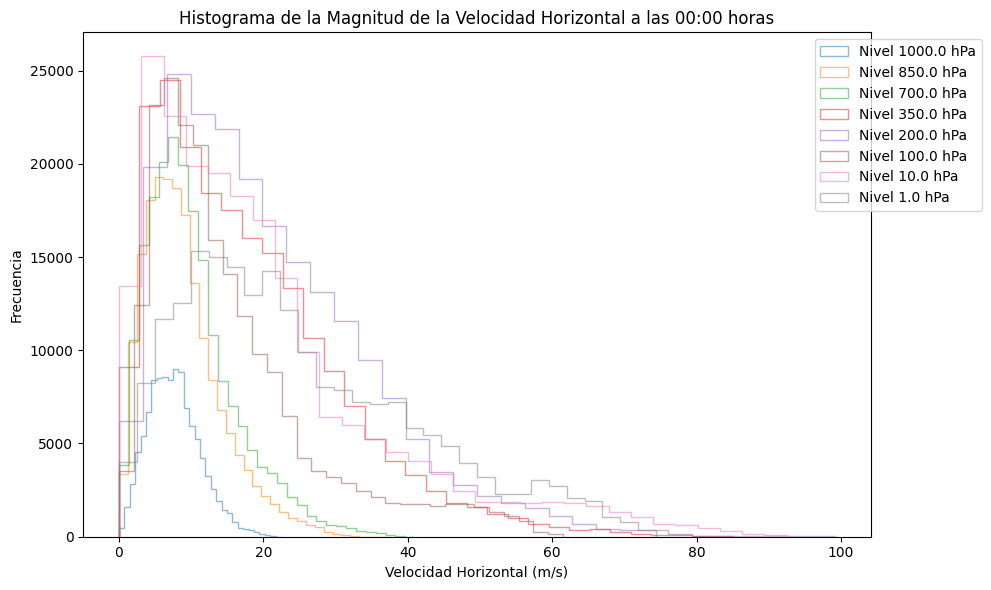

In [35]:
# Índice para la hora 00:00 (asumiendo que es el primero)
jt = 0

#Lista para seleccionar los niveles deseados
levels = [1000, 850, 700, 350, 200, 100, 10, 1]

# Encontrar los índices de los niveles específicos
level_indices = [np.argmin(np.abs(levs - level)) for level in levels]

# Calcular la magnitud de la velocidad horizontal
mag3 = np.sqrt((myvars3D_new[jt,:,:,:,1])**2 + (myvars3D_new[jt,:,:,:,2])**2)

fig, ax = plt.subplots(figsize=(10, 6))

#iterar en el tamaño de levels
for i in range(len(levels)):
    level_idx = level_indices[i]
    level = levels[i]

    # Aplanar la matriz para obtener una lista de velocidades horizontales en este nivel
    mag_flat = mag3[level_idx].flatten()

    # Plotear el histograma
    ax.hist(mag_flat, bins=30, alpha=0.5, label=f'Nivel {level:.1f} hPa', histtype='step')

# Configurar etiquetas y título
ax.set_xlabel('Velocidad Horizontal (m/s)')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de la Magnitud de la Velocidad Horizontal a las 00:00 horas')
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()